## Trying out WTA NN from Mao & Massaquoi (2007)

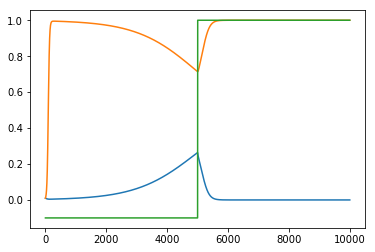

In [74]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline


def act(x):
    #a = 1./8
    b = 0.5
    return 1. / (1 + np.exp(-8. * (x - b))) # std. sigmoid
    #return x * (x >= 0) # Heaviside


#def dyn(x, t, ipt):
#    v = 1.
#    W = np.full((len(x), len(x)), v)
#    np.fill_diagonal(W, 0)
#    dx = -x - W @ act(x) + ipt
#    return dx


def dyn(x, t, ipt):
    W = np.array([[1, 1.1], [1.1, 1]])
    dx = ipt * x * (1 - W @ x)
    return dx

ntsteps = 10000
tau = 0.1
x = np.zeros((ntsteps, 2))
x[0,] = [0.01, 0.01]
#y = np.zeros((ntsteps, len(ipt0)))
ipt = np.zeros((ntsteps, 2))
ipt[:,1] = 0.5
ipt[:,0] = -0.1
ipt[ntsteps//2:,0] = 1.0
#ipt[:,0] = 0.75*np.sin(np.linspace(0, ntsteps, ntsteps) * (1/200)) + 1.0
#ipt[:,0] = 2*np.sin(np.linspace(0, ntsteps, ntsteps) * (1/1000))
#ipt[0:ntsteps//2,0] = np.linspace(-0.1, 1.5, ntsteps//2)
#ipt[ntsteps//2:,0] = np.linspace(1.5, -0.1, ntsteps//2)
#ipt[0:ntsteps//4,0] = 2.
#ipt[ntsteps//4:ntsteps//2,0] = -0.1
#ipt[ntsteps//2:(3*ntsteps//4),0] = 2.
#ipt[(3*ntsteps//4):,0] = -0.1
#ipt[0:1000,0] = 1.5
#ipt[1000:,0] = -1.25

for t in range(1, ntsteps):
    x[t,] = x[t-1,] + tau * dyn(x[t-1,], 0, ipt[t,])
#    x[t,] = np.clip(x[t,], -0.01, 1.1)
#    y[t,] = act(x[t,])
    

#plt.plot(y)
plt.plot(x)
plt.plot(ipt[:,0])
plt.show() # hysteresis!

#plt.plot(x[:,0], x[:,1])
#plt.show()